In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [4]:
dataset = pd.read_csv('./dataset/Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# preprocessing 

In [6]:
# drop irrelevant columns
dataset = dataset.drop(['RowNumber','CustomerId', 'Surname'], axis=1) # 1 means column wise

In [7]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### convert catagorical variables into numerical


In [8]:
# gender column into 0,1:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender']) # if we store into another var new column will be created.

In [9]:
dataset.head() # gender is converted into 0(female),1(male)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Gerography column has 3 catogories (france, germany, spain)
# converting into one hot encoding

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
geo_encoder = onehot_encoder.fit_transform(dataset[['Geography']])

In [11]:
print(dataset['Geography'].shape) # 1d vector
print(dataset[['Geography']].shape) # 2d matrix

(10000,)
(10000, 1)


In [12]:
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
geo_catagories = onehot_encoder.get_feature_names_out(['Geography']) # it has 3 samples that are converted into features
geo_catagories


array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [14]:
# now we use these columns as features and insert geo_encoder values init.

geo_encoded_df = pd.DataFrame(geo_encoder, columns= geo_catagories)

In [15]:
# geo_encoder values are inserted into geo_catagories features
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [16]:
# we have to insert the above features into the dataset
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# drop geography column from dataset, coz we will replace it with geo_encoded_df
drop_geo = dataset.drop(['Geography'], axis=1) # 1 means column


In [18]:
drop_geo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
dataset = pd.concat([drop_geo, geo_encoded_df], axis=1)

In [20]:
# features are added into the dataset
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


# saving encoder and scaler into file:

In [21]:

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

# split dataset into independent and dependent variables
- x = (all columns) => independent
- y = (['Exited'] column) => dependent 

In [22]:
x = dataset.drop(['Exited'], axis=1)
y = dataset[['Exited']] # keep it in 2d matrix like row, column wise, not in scaler form that's why [['Exited']]
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [23]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# spliting this into test and train

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # keeping test data 20%

# feature scaling

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [26]:
print(x_train)

[[ 0.35649971  0.91324755 -0.6557859  ...  1.00150113 -0.57946723
  -0.57638802]
 [-0.20389777  0.91324755  0.29493847 ... -0.99850112  1.72572313
  -0.57638802]
 [-0.96147213  0.91324755 -1.41636539 ... -0.99850112 -0.57946723
   1.73494238]
 ...
 [ 0.86500853 -1.09499335 -0.08535128 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.15932282  0.91324755  0.3900109  ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.47065475  0.91324755  1.15059039 ... -0.99850112  1.72572313
  -0.57638802]]


# storing feature scaling into file:


In [27]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [28]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


# building ANN model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [30]:
print(x_train.shape)
print(x_train[1].shape)
print(x_train[1])

(8000, 12)
(12,)
[-0.20389777  0.91324755  0.29493847 -0.3483691   0.69683765  0.80843615
  0.64920267  0.97481699  1.6612541  -0.99850112  1.72572313 -0.57638802]


### creating model


In [78]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train[1].shape)), # 1st hidden layer
    Dense(32, activation='relu'), # 1nd hidden layer
    Dense(16, activation='relu'), # 2nd hidden layer
    Dense(1, activation='sigmoid') # output layer
])

f:\Python_Projects\NLP_GenAi\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

### compile the model

In [80]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

### setup tensorboard

In [81]:
import datetime
datetime.datetime.now()

datetime.datetime(2025, 4, 30, 10, 40, 0, 98677)

In [82]:
file_path = 'logs/fir/' + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
file_path

'logs/fir/2025-04-30_10-40-00'

In [83]:
tensorflow_callback = TensorBoard(log_dir=file_path, histogram_freq=1)

In [84]:
tensorflow_callback

### setup early stopping

In [85]:
early_stoping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
# wait 10 epochs to check the changes in val_loss
# if it's very low, it stops training process
# and stores the w values, which has less loss

### Train model

In [86]:
history = model.fit(
        x_train, y_train, validation_data= (x_test, y_test), epochs=100,
        callbacks = [tensorflow_callback, early_stoping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7278 - loss: 0.5417 - val_accuracy: 0.8290 - val_loss: 0.3921
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8386 - loss: 0.3893 - val_accuracy: 0.8630 - val_loss: 0.3487
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8518 - loss: 0.3521 - val_accuracy: 0.8620 - val_loss: 0.3485
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8672 - loss: 0.3299 - val_accuracy: 0.8675 - val_loss: 0.3389
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8662 - loss: 0.3267 - val_accuracy: 0.8620 - val_loss: 0.3410
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8544 - loss: 0.3415 - val_accuracy: 0.8630 - val_loss: 0.3365
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8699 - loss: 0.3162 - val_accuracy: 0.8605 - val_loss: 0.3437
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8671 - loss: 0.3276 - val_accu

In [87]:
# saving model file
model.save("model.h5")

# Load tensorboard extension

In [88]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [89]:
%tensorboard --logdir logs/fir/2025-04-30_10-35-44

ERROR: Failed to launch TensorBoard (exited with 1).

In [90]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,916 (27.02 KB)

In [91]:
import os
print(os.listdir("logs/fir/2025-03-26_03-00-05/train"))


['events.out.tfevents.1742940021.HP-ENVY-X360.12000.0.v2']


In [92]:
%load_ext tensorboard
%tensorboard --logdir logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).

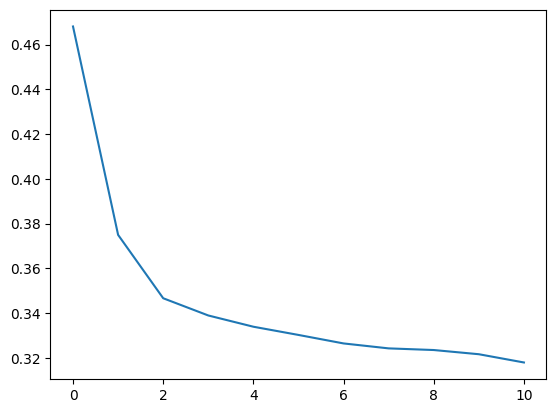

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

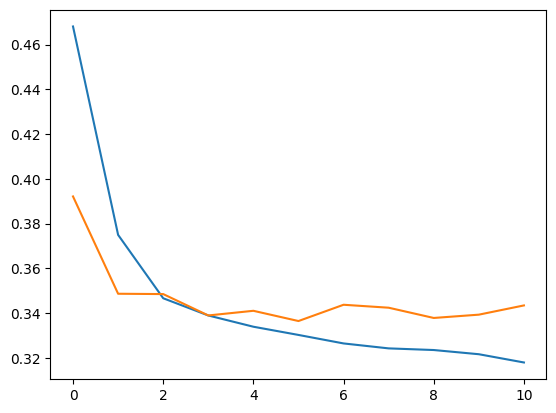

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

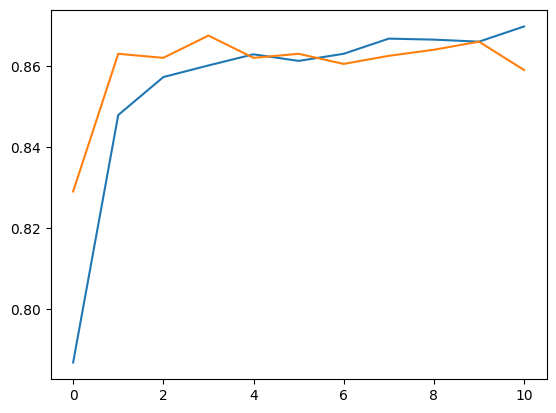

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.001)),  # 1st hidden layer with L2
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # 2nd hidden layer with L2
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile with a lower learning rate for stability
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


f:\Python_Projects\NLP_GenAi\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
history = model.fit(
        x_train, y_train, validation_data= (x_test, y_test), epochs=100,
        callbacks = [tensorflow_callback, early_stoping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7123 - loss: 0.6164 - val_accuracy: 0.8230 - val_loss: 0.4618
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8151 - loss: 0.4873 - val_accuracy: 0.8400 - val_loss: 0.4258
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8341 - loss: 0.4564 - val_accuracy: 0.8500 - val_loss: 0.4023
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8381 - loss: 0.4416 - val_accuracy: 0.8605 - val_loss: 0.3867
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8386 - loss: 0.4209 - val_accuracy: 0.8580 - val_loss: 0.3813
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8544 - loss: 0.3966 - val_accuracy: 0.8600 - val_loss: 0.3732
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8542 - loss: 0.3892 - val_accuracy: 0.8600 - val_loss: 0.3716
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8545 - loss: 0.3854 - va